## Market Segmentation

In [1]:
import pandas as pd
import numpy as np
import math

from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score, silhouette_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 40)
pd.set_option('display.width', 1000)

In [2]:
# Read CSV to DataFrame
artists = pd.read_csv('Data/artists_train.csv')

# Drop unnamed column
artists.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

# Create id_name_genre column
#artists['id_name'] = artists['artist_id'] + ', ' + artists['artist_name'].fillna('None')

# Preview dataframe
print(artists.info())
artists.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194248 entries, 0 to 194247
Data columns (total 28 columns):
artist_id                  194248 non-null object
artist_name                191716 non-null object
artist_followers           194248 non-null float64
artist_popularity          194248 non-null float64
track_popularity_mean      194248 non-null float64
track_popularity_std       194248 non-null float64
track_release_year_mean    194248 non-null float64
track_release_year_std     194248 non-null float64
acousticness_mean          194248 non-null float64
acousticness_std           194248 non-null float64
danceability_mean          194248 non-null float64
danceability_std           194248 non-null float64
duration_ms_mean           194248 non-null float64
duration_ms_std            194248 non-null float64
energy_mean                194248 non-null float64
energy_std                 194248 non-null float64
instrumentalness_mean      194248 non-null float64
instrumentalness_std    

,artist_id,artist_name,artist_followers,artist_popularity,track_popularity_mean,track_popularity_std,track_release_year_mean,track_release_year_std,acousticness_mean,acousticness_std,danceability_mean,danceability_std,duration_ms_mean,duration_ms_std,energy_mean,energy_std,instrumentalness_mean,instrumentalness_std,liveness_mean,liveness_std,loudness_mean,loudness_std,speechiness_mean,speechiness_std,tempo_mean,tempo_std,valence_mean,valence_std
0,2jTsRGHAvKXXSbeO52G1t5,Webbstur,3453.0,28.0,17.8,10.195860,2017.3,0.948683,0.170563,0.255500,0.5925,0.116009,245121.3,51594.498027,0.84040,0.086234,0.413950,0.373703,0.15339,0.093559,-6.7449,1.570696,0.04442,0.015108,124.9970,2.174399,0.42026,0.266024
1,5CRw2KQzb9aH8HuyuQ6QCL,Ozy,103.0,6.0,2.5,5.233439,2012.7,4.001389,0.197861,0.354064,0.6189,0.177373,267232.6,94528.177818,0.72450,0.278383,0.672460,0.294077,0.21175,0.136774,-9.2551,5.195449,0.09468,0.055908,148.4241,21.335355,0.44111,0.272943
2,11fxyJpCpCnuG2c6NMuZNt,Bia Macedo,5177.0,11.0,7.8,4.391912,2017.0,0.000000,0.262620,0.159743,0.6322,0.087031,180036.6,12755.167904,0.87670,0.123941,0.000000,0.000000,0.37700,0.226577,-2.9268,2.288700,0.12018,0.090222,153.8066,20.089296,0.77540,0.090969
3,0pRBqfB42iVqXKIFJdfFKS,Brett Detar,1781.0,20.0,14.1,7.752419,2011.8,1.549193,0.183107,0.270250,0.4248,0.128387,259215.9,49391.796063,0.66320,0.200920,0.072125,0.140028,0.22184,0.176418,-7.4456,2.286342,0.03678,0.017357,135.1359,29.490275,0.48690,0.269610
4,5MpELOfAiq7aIBTij30phD,Harry James,17750.5,53.0,34.7,9.894709,1977.8,31.701901,0.841900,0.158289,0.4435,0.140408,197270.7,38825.948564,0.24639,0.198372,0.267144,0.373276,0.18035,0.086693,-12.8619,4.617813,0.03994,0.018269,100.5924,21.342652,0.40420,0.173864


In [3]:
# Standardize with scalers

# Define X
X_train = artists.drop(columns=['artist_id', 'artist_name'])

# Standardize with Standard Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_sscaled = ss.fit_transform(X_train)
X_train_sscaled = pd.DataFrame(X_train_sscaled, columns=X_train.columns)

# Standardize with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_mmscaled = mms.fit_transform(X_train)
X_train_mmscaled = pd.DataFrame(X_train_mmscaled, columns=X_train.columns)

In [4]:
# Incorporating PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X_train_sscaled_pca = pca.fit_transform(X_train_sscaled)
X_train_mmscaled_pca = pca.fit_transform(X_train_mmscaled)

In [5]:
# K = 3

# K-Means in SKLearn
k_means_3_pca = KMeans(n_clusters=3)
k_means_3_pca.fit(X_train_sscaled_pca)
yhat_3_pca = k_means_3_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_3_pca = k_means_3_pca.labels_
sil_sc_3_pca = silhouette_score(X_train_sscaled_pca, yhat_3_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_3_pca)

# Calinski Harabasz Score
ch_sc_3_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_3_pca)
print('Calinski Harabasz Score:', ch_sc_3_pca)

Silhouette Score: 0.26316417556536403
Calinski Harabasz Score: 64714.847128484755


In [6]:
# K = 4

# K-Means in SKLearn
k_means_4_pca = KMeans(n_clusters=4)
k_means_4_pca.fit(X_train_sscaled_pca)
yhat_4_pca = k_means_4_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_4_pca = k_means_4_pca.labels_
sil_sc_4_pca = silhouette_score(X_train_sscaled_pca, yhat_4_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_4_pca)

# Calinski Harabasz Score
ch_sc_4_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_4_pca)
print('Calinski Harabasz Score:', ch_sc_4_pca)

Silhouette Score: 0.26475790352828066
Calinski Harabasz Score: 66975.16999119849


In [7]:
# K = 5

# K-Means in SKLearn
k_means_5_pca = KMeans(n_clusters=5)
k_means_5_pca.fit(X_train_sscaled_pca)
yhat_5_pca = k_means_5_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_5_pca = k_means_5_pca.labels_
sil_sc_5_pca = silhouette_score(X_train_sscaled_pca, yhat_5_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_5_pca)

# Calinski Harabasz Score
ch_sc_5_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_5_pca)
print('Calinski Harabasz Score:', ch_sc_5_pca)

Silhouette Score: 0.2720997387460375
Calinski Harabasz Score: 64750.84462154612


In [8]:
# K = 6

# K-Means in SKLearn
k_means_6_pca = KMeans(n_clusters=6)
k_means_6_pca.fit(X_train_sscaled_pca)
yhat_6_pca = k_means_6_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_6_pca = k_means_6_pca.labels_
sil_sc_6_pca = silhouette_score(X_train_sscaled_pca, yhat_6_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_6_pca)

# Calinski Harabasz Score
ch_sc_6_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_6_pca)
print('Calinski Harabasz Score:', ch_sc_6_pca)

Silhouette Score: 0.2616354081141501
Calinski Harabasz Score: 63990.23451849945


In [9]:
# K = 10

# K-Means in SKLearn
k_means_10_pca = KMeans(n_clusters=10)
k_means_10_pca.fit(X_train_sscaled_pca)
yhat_10_pca = k_means_10_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_10_pca = k_means_10_pca.labels_
sil_sc_10_pca = silhouette_score(X_train_sscaled_pca, yhat_10_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_10_pca)

# Calinski Harabasz Score
ch_sc_10_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_10_pca)
print('Calinski Harabasz Score:', ch_sc_10_pca)

Silhouette Score: 0.22378554503219542
Calinski Harabasz Score: 51156.48965693418


In [10]:
# K = 13

# K-Means in SKLearn
k_means_13_pca = KMeans(n_clusters=13)
k_means_13_pca.fit(X_train_sscaled_pca)
yhat_13_pca = k_means_13_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_13_pca = k_means_13_pca.labels_
sil_sc_13_pca = silhouette_score(X_train_sscaled_pca, yhat_13_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_13_pca)

# Calinski Harabasz Score
ch_sc_13_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_13_pca)
print('Calinski Harabasz Score:', ch_sc_13_pca)

Silhouette Score: 0.22135206493531567
Calinski Harabasz Score: 46515.230195379074


In [11]:
# K = 19

# K-Means in SKLearn
k_means_19_pca = KMeans(n_clusters=19)
k_means_19_pca.fit(X_train_sscaled_pca)
yhat_19_pca = k_means_19_pca.predict(X_train_sscaled_pca)

# Silhouette Score
#labels_19_pca = k_means_19_pca.labels_
sil_sc_19_pca = silhouette_score(X_train_sscaled_pca, yhat_19_pca, metric='euclidean')
print('Silhouette Score:', sil_sc_19_pca)

# Calinski Harabasz Score
ch_sc_19_pca = calinski_harabasz_score(X_train_sscaled_pca, yhat_19_pca)
print('Calinski Harabasz Score:', ch_sc_19_pca)

Silhouette Score: 0.20254553013199914
Calinski Harabasz Score: 39427.166825484666


In [12]:
k_values = [3, 4, 5, 6, 10, 13, 19]

In [13]:
silhouette_scores = [sil_sc_3_pca, 
                     sil_sc_4_pca, 
                     sil_sc_5_pca, 
                     sil_sc_6_pca, 
                     sil_sc_10_pca, 
                     sil_sc_13_pca, 
                     sil_sc_19_pca]
silhouette_scores

[0.26316417556536403,
 0.26475790352828066,
 0.2720997387460375,
 0.2616354081141501,
 0.22378554503219542,
 0.22135206493531567,
 0.20254553013199914]

In [14]:
calinski_harabasz_scores = [ch_sc_3_pca, 
                            ch_sc_4_pca, 
                            ch_sc_5_pca, 
                            ch_sc_6_pca, 
                            ch_sc_10_pca, 
                            ch_sc_13_pca, 
                            ch_sc_19_pca]
calinski_harabasz_scores

[64714.847128484755,
 66975.16999119849,
 64750.84462154612,
 63990.23451849945,
 51156.48965693418,
 46515.230195379074,
 39427.166825484666]

In [15]:
len(k_values) == len(silhouette_scores) == len(calinski_harabasz_scores)

True

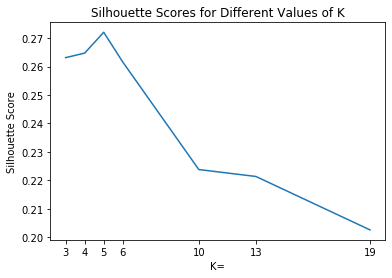

In [16]:
plt.plot(k_values, silhouette_scores)
plt.xticks(k_values)
plt.title("Silhouette Scores for Different Values of K")
plt.ylabel("Silhouette Score")
plt.xlabel("K=")
plt.show()

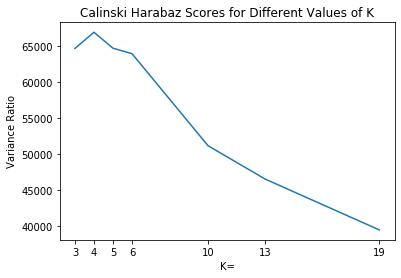

In [17]:
plt.plot(k_values, calinski_harabasz_scores)
plt.xticks(k_values)
plt.title("Calinski Harabaz Scores for Different Values of K")
plt.ylabel("Variance Ratio")
plt.xlabel("K=")
plt.show()

In [ ]:
# Market Segmentation

# 1. Import Data
# 2. Assign X & y

# 3. Clustering Analysis
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)
k_means.fit(X)
cluster_preds = k_means.predict(X)

# 4. Check Performance
from sklearn.metrics.cluster import calinski_harabasz_score, adjusted_rand_score
calinski_harabasz_score(df, cluster_preds)
# 171.68 - pretty low score, suggesting clusters aren't great
adjusted_rand_score(channels, cluster_preds)
# -0.0306 - suggests clusters no better than random choice

# 5. Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

scaled_k_means = KMeans(n_clusters=2)
scaled_k_means.fit(scaled_X)
scaled_preds = scaled_k_means.predict(scaled_X)

adjusted_rand_score(channels, scaled_preds)
# 0.2128 = big improvement, not perfect, but scaling helped

# 6. Incorporating PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_X = pca.fit_transform(scaled_X)

np.cumsum(pca.explained_variance_ratio_)

pca_k_means = KMeans(n_clusters=2)
pca_k_means.fit(pca_X)
pca_preds = pca_k_means.predict(pca_X)

adjusted_rand_score(channels, pca_preds)
'''
0.2366 - higher than just scaling, 
better than random chance, but far from perfect
best performance was achieved when reducing 
the number of Principal Components down to 4. 
The increase in model performance is likely due 
to the reduction in dimensionality. Although dropping 
the last 2 PCs means that we lose about 6% of our 
explained variance, this proved to be a net-positive 
trade-off for the reduction in dimensionality it provided.
'''

# 7. HAC
# Don't just try HAC on the PCA-transformed dataset!!
# Also compare algorithm performance on the scaled 
# and unscaled datasets, as well!
from sklearn.cluster import AgglomerativeClustering

hac = AgglomerativeClustering(n_clusters=2)
hac.fit(pca_df)
hac_pca_preds = hac.labels_

adjusted_rand_score(channels, hac_pca_preds)

hac2 = AgglomerativeClustering(n_clusters=2)
hac2.fit(scaled_df)
hac_scaled_preds = hac2.labels_

adjusted_rand_score(channels, hac_scaled_preds)

hac3 = AgglomerativeClustering(n_clusters=2)
hac3.fit(df)
hac__preds = hac3.labels_

adjusted_rand_score(channels, hac__preds)